In [112]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import operator
import scipy
from mpl_toolkits.mplot3d import Axes3D
from functools import partial


In [2]:
def cube(x):
    return x**3
def module(x):
    return abs(x-0.2)
def sinus(x):
    return x*math.sin(1/x)

In [29]:
def exhaustiveSearch(function, a, b, eps):
    n = math.ceil((b - a) / eps)
    x = np.linspace(a, b, n)
    y = [function(i) for i in x]
    plt.plot(x, y)
    
    xk = [a + k*(b-a)/n for k in range(n)]
    f_xk = [(function(item),item) for item in xk]
    y_MIN = None
    x_MIN = None
    iterCount = 0
    for item in f_xk:
        iterCount += 1
        if y_MIN == None:
            y_MIN = item[0]
            x_MIN = item[1]
        if item[0] < y_MIN:
            y_MIN = item[0]
            x_MIN = item[1]
        plt.scatter(item[1],item[0], color="black")
    
    plt.plot(x_MIN, y_MIN, 'o', color="red")
    plt.show()
    return len(f_xk), iterCount

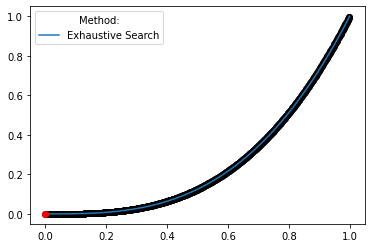

(1000, 1000)


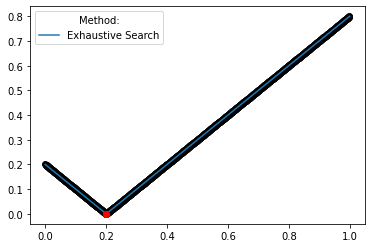

(1000, 1000)


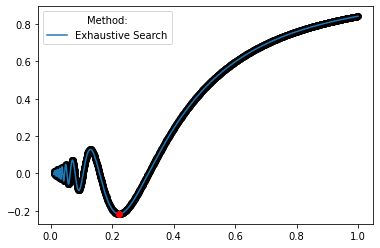

(990, 990)


In [30]:
eps = 0.001
print(exhaustiveSearch(cube, 0, 1, eps))
print(exhaustiveSearch(module, 0, 1, eps))
print(exhaustiveSearch(sinus, 0.01, 1, eps))

In [27]:
def dichotomy(function, a, b, eps):
    n = math.ceil((b - a) / eps)
    x = np.linspace(a, b, n)
    y = [function(i) for i in x]
    plt.plot(x, y)
    
    a0 = a
    b0 = b
    delta = 0.0001
    iterCount = 0
    fCount = 0
    while abs(a0 - b0) >= eps:
        iterCount += 1
        x1 = (a0 + b0 - delta)/2
        x2 = (a0 + b0 + delta)/2
        f_x1 = function(x1)
        f_x2 = function(x2)
        fCount += 2
        if f_x1 <= f_x2:
            b0 = x2
        else:
            a0 = x1
        x_MIN = (a0 + b0)/2
        y_MIN = function(x_MIN)
        plt.scatter(x_MIN, y_MIN, color="black")
        
    x_MIN = (a0+b0)/2
    y_MIN = function(x_MIN)
    
    plt.plot(x_MIN, y_MIN, 'o', color="red")
    plt.show()
    return fCount, iterCount

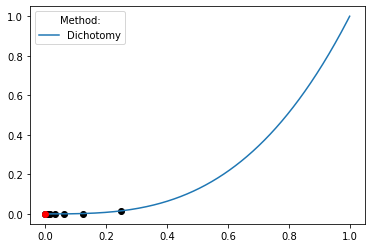

(22, 11)


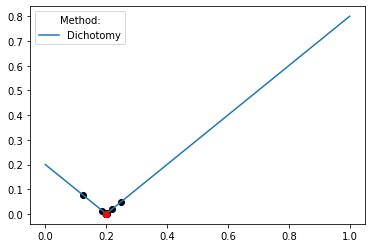

(22, 11)


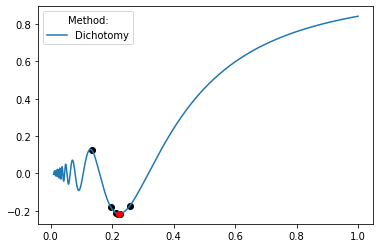

(22, 11)


In [28]:
eps = 0.001
print(dichotomy(cube, 0, 1, eps))
print(dichotomy(module, 0, 1, eps))
print(dichotomy(sinus, 0.01, 1, eps))

In [31]:
def gold(function, a, b, eps):
    delta = (3 - np.sqrt(5)) / 2
    coords = [[left, right]]
    x1, x2 = left + delta * (right - left), right - delta * (right - left)
    f_x1, f_x2 = map(func, [x1, x2])
    iters = 2
    while (right - left) > eps:
        if f_x1 <= f_x2:
            right = x2
            x2 = x1
            f_x2 = f_x1
            calc_x2 = False
        else:
            left = x1
            x1 = x2
            f_x1 = f_x2
            calc_x2 = True
        coords.append([left, right])

        if calc_x2:
            x2 = right - delta * (right - left)
            f_x2 = func(x2)
        else:
            x1 = left + delta * (right - left)
            f_x1 = func(x1)
        iters += 1
    min_f = func((right - left) / 2 + right)
    return {"min": (right - left) / 2 + right, "func_min": min_f, "iterations": iters, "coords": coords}

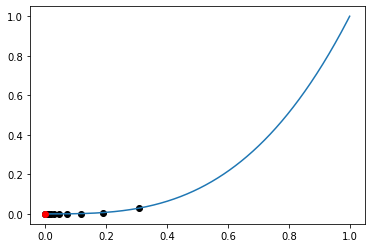

(30, 15)


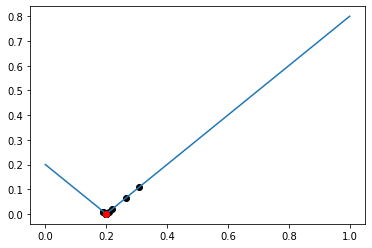

(30, 15)


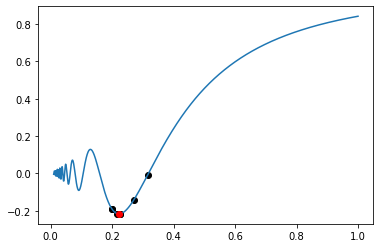

(30, 15)


In [33]:
eps = 0.001
print(gold(cube, 0, 1, eps))
print(gold(module, 0, 1, eps))
print(gold(sinus, 0.01, 1, eps))

In [72]:
def D_sum(function, x, a, b, y_bad):
    approx = function(x, a, b)
    return np.sum((approx - y_bad) ** 2)

In [60]:
def linear_approx(X, a, b):
    return X * a + b


def rational_approx(X, a, b):
    return a / (1 + b * X)

In [160]:
def exhaustiveSearchMD(d_func, function, x, y, name, epsilon, y_true): 
    a_bounds=(-1, 1)
    b_bounds=(-1, 1)
    a_values = np.arange(a_bounds[0], a_bounds[1] + epsilon, epsilon)
    b_values = np.arange(b_bounds[0], b_bounds[1] + epsilon, epsilon)
    min_loss = 10 ** 10

    for i in a_values:
        for j in b_values:
            loss_value = d_func(function, x, i, j, y)
            if loss_value < min_loss:
              min_args = {"a": i, "b": j}
              min_loss = loss_value

    plt.rcParams["figure.figsize"] = (10, 10)
    plt.scatter(x, y)
    plt.plot(x, y_true, color='blue')
    a = min_args['a']
    b = min_args['b']
    plt.plot(x, function(x, a, b), color='red', label=f': name = {name}, a = {a:.2f}, b = {b:.2f}, loss = {min_loss:.1f}, iterations = {a_values.shape[0] * b_values.shape[0]}')
    plt.legend()
    plt.show()

In [161]:
def golden_section(func, left, right, epsilon=0.001):
    delta = (3 - np.sqrt(5)) / 2
    coords = [[left, right]]
    x1, x2 = left + delta * (right - left), right - delta * (right - left)
    f_x1, f_x2 = map(func, [x1, x2])
    iters = 2
    while (right - left) > epsilon:
        if f_x1 <= f_x2:
            right = x2
            x2 = x1
            f_x2 = f_x1
            calc_x2 = False
        else:
            left = x1
            x1 = x2
            f_x1 = f_x2
            calc_x2 = True
        coords.append([left, right])

        if calc_x2:
            x2 = right - delta * (right - left)
            f_x2 = func(x2)
        else:
            x1 = left + delta * (right - left)
            f_x1 = func(x1)
        iters += 1
    min_f = func((right - left) / 2 + right)
    return {"min": (right - left) / 2 + right, "func_min": min_f, "iterations": iters, "coords": coords}

In [162]:
def gauss(d_func, function, X, y, name, epsilon, y_true):
    a_bounds=(-1, 1)
    b_bounds=(-1, 1)
    a, b = map(np.mean, [a_bounds, b_bounds])
    a_prev, b_prev = a_bounds[0], b_bounds[0]
    loss_prev = d_func(function, X, a, b, y)

    min_loss = 10 ** 10
    iters = 1
    loss_values = []
    coords = [[a, b]]

    while (scipy.spatial.distance.euclidean([a_prev, b_prev], [a, b]) > epsilon and np.abs(loss_prev - min_loss) > epsilon):
        for opt_var in ["a", "b"]:
            if opt_var == "a":
                aux_func = lambda x: d_func(function, X, a=x, b=b, y_bad=y)
                opt = golden_section(aux_func, a_bounds[0], b_bounds[1], epsilon=epsilon)
                a_prev = a
                a = opt["min"]
            else:
                aux_func = lambda x: d_func(function, X, a=a, b=x, y_bad=y)
                opt = golden_section(aux_func, b_bounds[0], b_bounds[1], epsilon=epsilon)
                b_prev = b
                b = opt["min"]

            iters += opt["iterations"]
            min_loss = opt["func_min"]
            loss_values.append(min_loss)
            coords.append([a, b])

    plt.rcParams["figure.figsize"] = (10, 10)
    plt.scatter(X, y)
    plt.plot(X, y_true, color='blue')
    plt.plot(X, function(X, a, b), color='red', label=f': name = {name}, a = {a:.2f}, b = {b:.2f}, loss = {min_loss:.1f}, iterations = {iters}')
    plt.legend()
    plt.show()

In [163]:
  def nelder_mead(d_func, function, X, y, name, eps, y_true):
    a_bounds=(-1, 1)
    b_bounds=(-1, 1)
    opt_func = lambda x: d_func(function, x=X, a=x[0], b=x[1], y_bad=y)
    a0, b0 = map(np.mean, [a_bounds, b_bounds])
    result = scipy.optimize.minimize(
        opt_func, x0=np.asarray([a0, b0]), method="Nelder-Mead", options={"xatol": eps, "fatol": eps}
    )

    plt.plot(X, y_true, color='blue')
    plt.scatter(X, y)
    a = result.x[0]
    b = result.x[1]
    plt.plot(X, function(X, a, b), color='red', label=f': name = {name}, a = {a:.2f}, b = {b:.2f}, loss = {result.fun:.1f}, iterations = {result.nfev}')
    plt.legend()
    plt.show()

0.771320643266746 0.0207519493594015


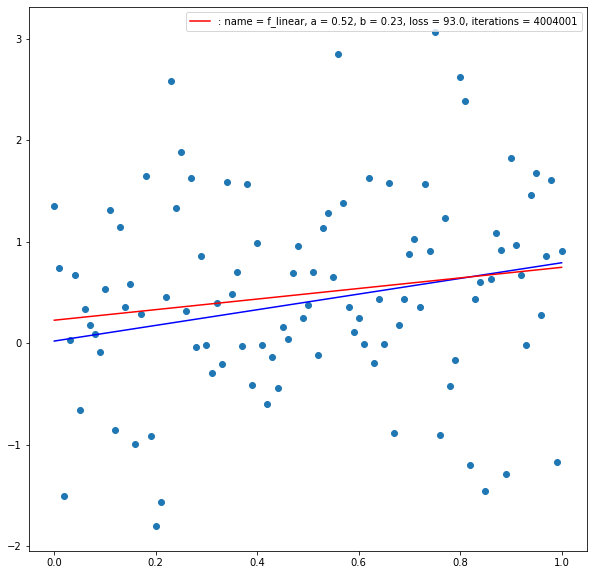

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


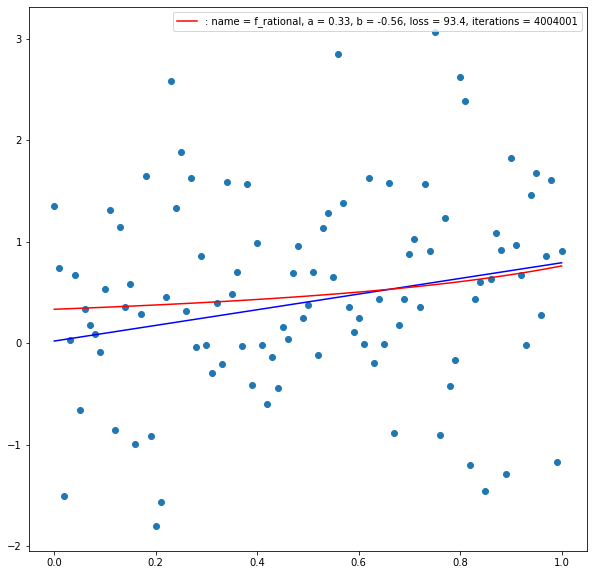

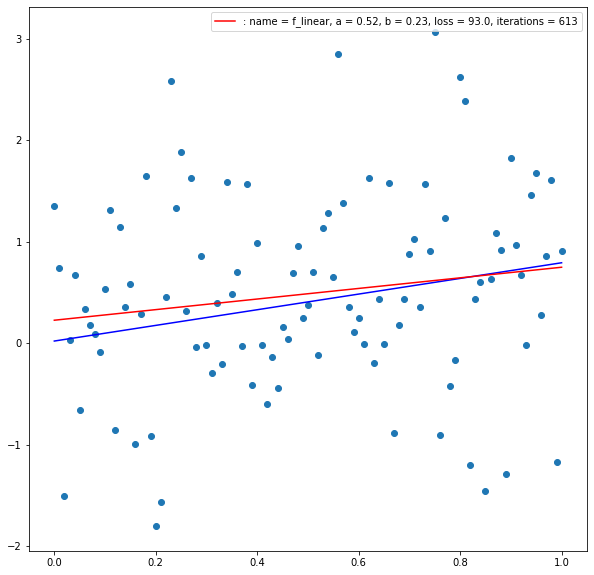

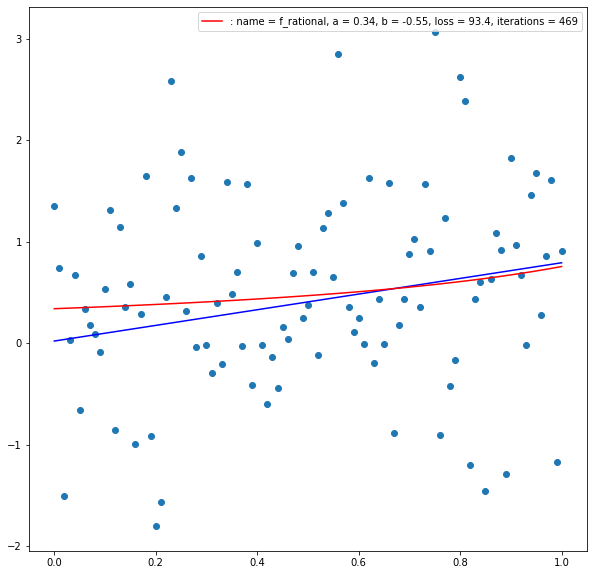

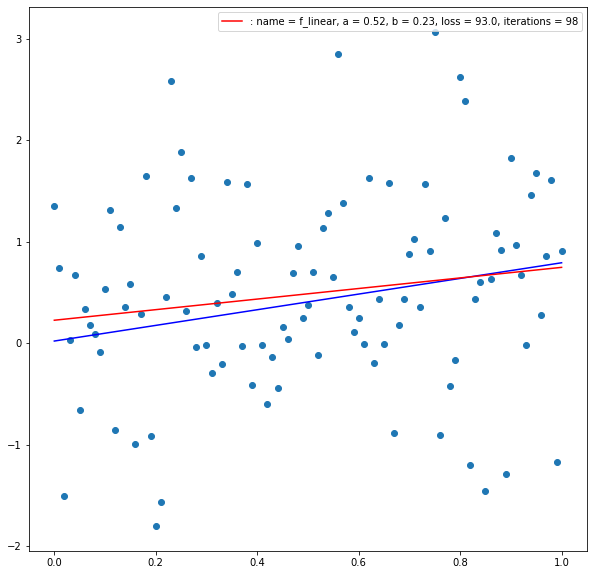

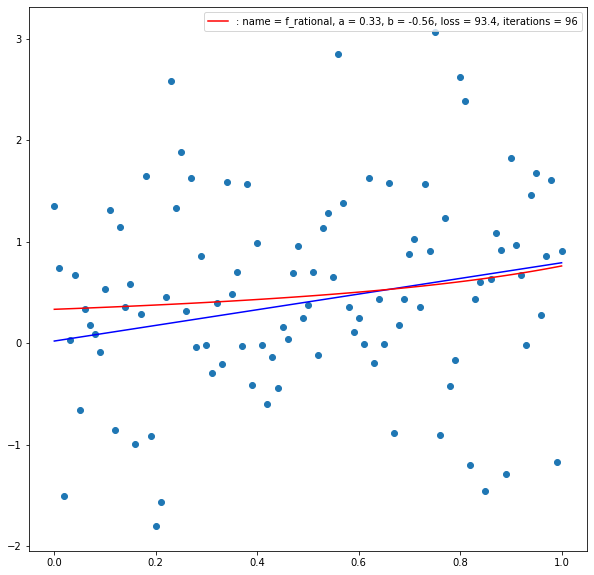

In [165]:
np.random.seed(10)
k = 100
eps = 0.001
alpha, beta = np.random.uniform(size=2)
print(alpha, beta)

x_vec = np.arange(0, 1.01, 0.01)
delta = np.random.normal(size=x_vec.shape)
y = alpha * x_vec + beta
y_bad = alpha * x_vec + beta + delta

exhaustiveSearchMD(D_sum, linear_approx, x_vec, y_bad, "f_linear", eps, y)
exhaustiveSearchMD(D_sum, rational_approx, x_vec, y_bad, "f_rational", eps, y)
gauss(D_sum, linear_approx, x_vec, y_bad, "f_linear", eps, y)
gauss(D_sum, rational_approx, x_vec, y_bad, "f_rational", eps, y)
nelder_mead(D_sum, linear_approx, x_vec, y_bad, "f_linear", eps, y)
nelder_mead(D_sum, rational_approx, x_vec, y_bad, "f_rational", eps, y)